# Accident Detection Using Images

In [1]:
#Importing necessary Dependencies

In [15]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from PIL import Image

In [16]:
from tensorflow.keras.models import load_model
model_path = "/kaggle/input/accident-h5model/Accident_model.h5"
model = load_model(model_path)

In [17]:
#Model Hyperparams

In [18]:
batch_size = 100
img_height = 250
img_width = 250

In [19]:
#Prediction

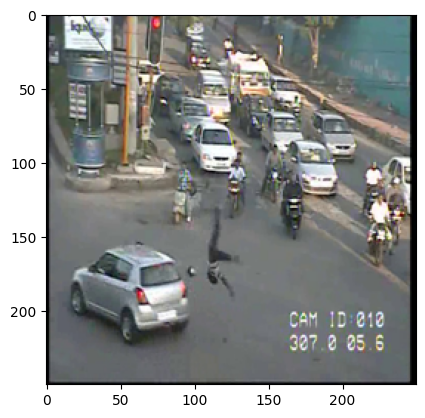

1/1 [==============================] - 0s 58ms/step
Prediction: Non-Accident - Non Accident.


In [45]:
from PIL import Image
new_image_path = "/kaggle/input/accident-detection-from-cctv-footage/data/train/Accident/acc1 (3).jpg"


img = Image.open(new_image_path).resize((img_width, img_height))
plt.imshow(img)
plt.show()

img = np.asarray(img)
img = img / 255.0

output = model.predict(np.expand_dims(img, axis=0))

prediction = np.argmax(output)  # Get class index
class_names = ["Accident", "Non-Accident"]  # Replace with your actual class names

if prediction == 0:
    print(f"Prediction: {class_names[prediction]} - Accident.")
else:
    print(f"Prediction: {class_names[prediction]} - Non Accident.")


In [27]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/accident-detection-from-cctv-footage/data/train',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/accident-detection-from-cctv-footage/data/test',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/accident-detection-from-cctv-footage/data/val',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [29]:
class_names = training_ds.class_names
class_names

['Accident', 'Non Accident']

4/4 [==============================] - 3s 622ms/step


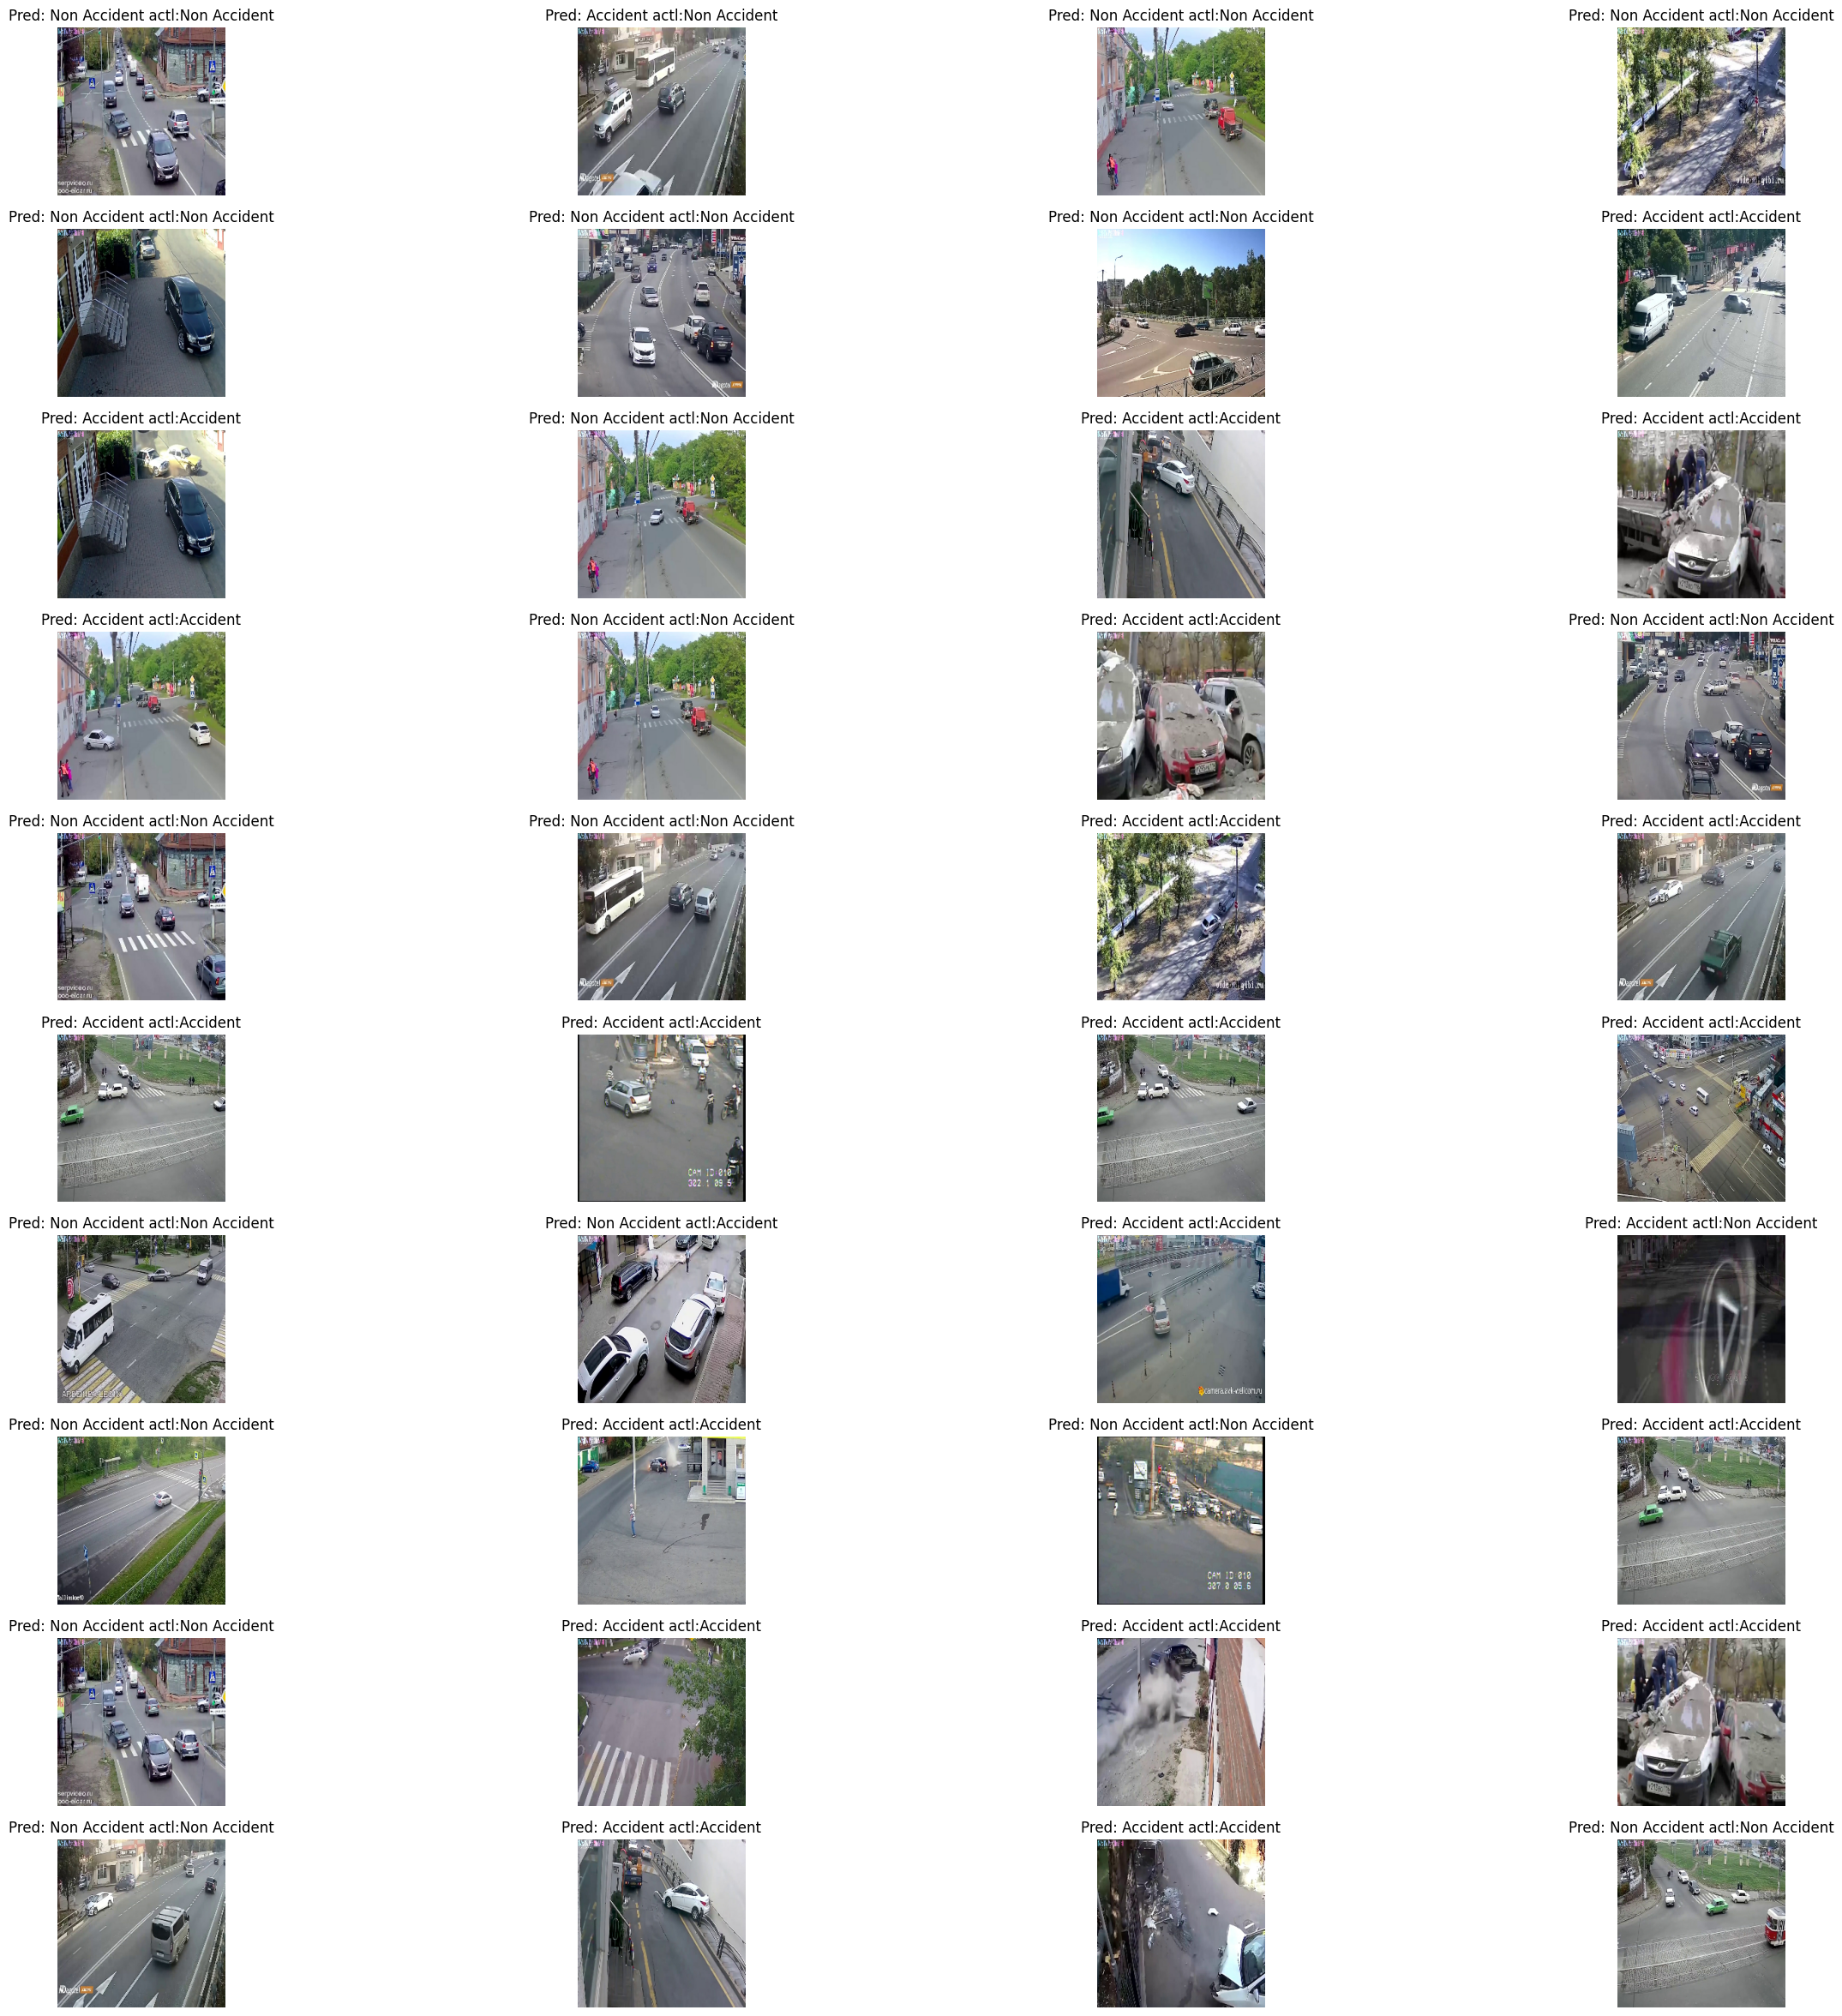

In [30]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)